In [1]:
# 画图工具
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',500)
pd.set_option('display.width',1000)
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties 
font_set = FontProperties(fname=r"C:\windows\fonts\MicroSoft YaHei.ttc", size=12)
# %matplotlib inline 
# auto 弹出窗口 inline 默认，在当前页显示
#指定默认字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.family']='sans-serif'
#解决负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False

import math
import seaborn as sns
import warnings;warnings.filterwarnings(action='once')
import matplotlib as mpl

warnings.filterwarnings('ignore')

large=22;med=16;small=12;
params={'axes.titlesize':large,
        'legend.fontsize':med,
        'figure.figsize':(16,10),
        'axes.labelsize':med,
        'axes.titlesize':med,
        'xtick.labelsize':med,
        'ytick.labelsize':med,
        'figure.titlesize':large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style('white')
print(mpl.__version__)
print(sns.__version__)


3.3.1
0.10.1


In [4]:
from pyecharts import *

In [5]:
from ipywidgets import widgets,Button,Label

In [187]:
# 引入订单数据
df = pd.read_excel(r"C:\Users\57165\Desktop\data\datas\wjl.xlsx",sheet_name='Sheet1',dtype={'sFdbh':str})
df=df.fillna(0)
df['drq']=pd.to_datetime(df['drq'])
df.head()

,sXsdh,sFdbh,sSpbh,nXssl,nMl,nXsdj,nxsje,sSpmc,shour,dweek,drq,sFDMC,sflmc,szl,sdl,sl
0,2021080718015301205,012,2501053,0.3182,3.800,19.80,6.3004,散装黎祥陈皮梅软糖,18,31,2021-08-07,跳马店,34020601糖果、奶片,340206糖果、奶片,3402散装休闲,34散装食品
1,2021080718020100101,001,6926896700944,2.0000,1.400,5.00,10.0000,吉香居脆豇豆228g (1*30),18,31,2021-08-07,朱桥店,05040101袋装酱菜,050401袋装酱菜,0504厨房调料—酱菜,05厨房调料
2,2021080718024100101,001,6927643511103,1.0000,1.900,3.90,3.9000,高洁美110C炭丝护龈牙刷,18,31,2021-08-07,朱桥店,10030201成人牙刷,100302牙刷,1003口腔清洁用品,10个人护理
3,2021080718025300602,006,6971553521066,1.0000,2.200,9.90,9.9000,湘味粮村麻花450g (1*20),18,31,2021-08-07,仙人市店,02020501浏阳特产,020205浏阳特产,0202糕点,02饼干食品
4,2021080718025401302,013,2786660,0.8301,2.027,9.36,7.7697,A大块冰糖 （1*15）,18,31,2021-08-07,干杉店,41030101散糖,410301散糖,4103散称调味料,41散装食杂


### 第一部分
两期销售总体变化

In [11]:
df.head(10)

,sXsdh,sFdbh,sSpbh,nXssl,nMl,nXsdj,nxsje,sSpmc,shour,dweek,drq,sFDMC,sflmc,szl,sdl,sl
0,2021080718015301205,012,2501053,0.3182,3.800,19.80,6.3004,散装黎祥陈皮梅软糖,18,31,2021-08-07,跳马店,34020601糖果、奶片,340206糖果、奶片,3402散装休闲,34散装食品
1,2021080718020100101,001,6926896700944,2.0000,1.400,5.00,10.0000,吉香居脆豇豆228g (1*30),18,31,2021-08-07,朱桥店,05040101袋装酱菜,050401袋装酱菜,0504厨房调料—酱菜,05厨房调料
2,2021080718024100101,001,6927643511103,1.0000,1.900,3.90,3.9000,高洁美110C炭丝护龈牙刷,18,31,2021-08-07,朱桥店,10030201成人牙刷,100302牙刷,1003口腔清洁用品,10个人护理
3,2021080718025300602,006,6971553521066,1.0000,2.200,9.90,9.9000,湘味粮村麻花450g (1*20),18,31,2021-08-07,仙人市店,02020501浏阳特产,020205浏阳特产,0202糕点,02饼干食品
4,2021080718025401302,013,2786660,0.8301,2.027,9.36,7.7697,A大块冰糖 （1*15）,18,31,2021-08-07,干杉店,41030101散糖,410301散糖,4103散称调味料,41散装食杂
5,2021080718025800802,008,2100158,0.7420,10.600,31.60,23.4472,散饼干糕点F,18,31,2021-08-07,高桥店,34010101饼干,340101饼干,3401散装饼干,34散装食品
6,2021080718025800802,008,2185717,0.3202,2.800,17.80,5.6996,散称德雅村小粒花生 （1*10）,18,31,2021-08-07,高桥店,34020301炒货,340203炒货,3402散装休闲,34散装食品
7,2021080718025800802,008,2404558,0.2797,9.600,23.60,6.6009,散汤家园焦糖瓜子裸散（1*5）,18,31,2021-08-07,高桥店,34020301炒货,340203炒货,3402散装休闲,34散装食品
8,2021080718025800802,008,6924743923515,1.0000,1.150,5.50,5.5000,A乐事黄金炒蟹味70g(1*22）,18,31,2021-08-07,高桥店,02010101包装薯片,020101包装薯片,0201膨化,02饼干食品
9,2021080718025800802,008,8936050230192,1.0000,4.000,13.80,13.8000,沙巴哇菠萝蜜干100g(1*40）,18,31,2021-08-07,高桥店,03050101休闲,030501休闲,0305进口食品,03休闲小食


#### 1.每周销售汇总


No handles with labels found to put in legend.


<Figure size 1600x640 with 0 Axes>

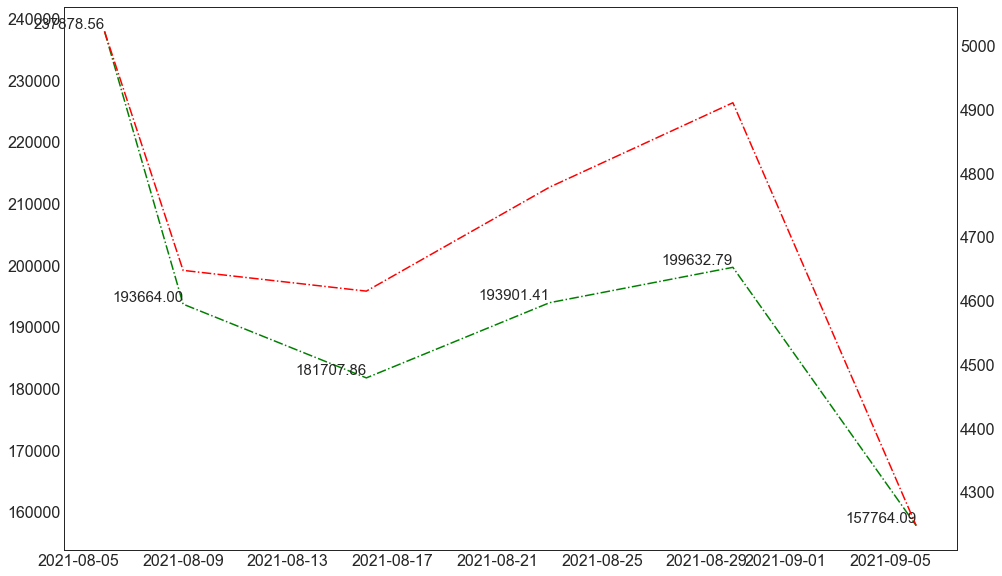

In [285]:
week_xs=df.groupby('dweek').sum()['nxsje'].reset_index();
#week_xs=df.groupby('dweek').agg([np.sum]).reset_index();
# 对不同列进行不同的操作
def my_unique(s):
    return s.unique()
week_xs=df.groupby('dweek').agg({'nxsje':'sum','drq':'min'}).reset_index()
#重命名
week_nts=df.groupby('dweek')['drq'].nunique().reset_index().rename(columns={'drq':'nts'})
week_nkds=df.groupby('dweek')['sXsdh'].nunique().reset_index().rename(columns={'sXsdh':'nkds'})
# 将两个数组组合起来
week_xs=pd.merge(week_xs,week_nts,on='dweek')
week_xs=pd.merge(week_xs,week_nkds,on='dweek')
week_xs['nrjxse']=week_xs['nxsje']/week_xs['nts']
week_xs['nrjkds']=week_xs['nkds']/week_xs['nts']
plt.figure(figsize=(20,8), dpi= 80)
fig,ax1 = plt.subplots()
# plt.plot(week_xs['drq'],week_xs.loc[:,['nrjxse','nrjkds']],'-.',color='green')
plt.plot(week_xs['drq'],week_xs.loc[:,['nrjxse']],'-.',color='green')
plt.legend()
# 加上数值
for x, y in zip(week_xs['drq'],week_xs['nrjxse']):  # 显示文本
    plt.text(x, y + 0.05, '%.2f'%y,fontsize=15, ha='right', va='bottom',)
# 次坐标
ax2=ax1.twinx()
plt.plot(week_xs['drq'],week_xs.loc[:,['nrjkds']],'-.',color='red')



In [71]:
# 计算门店每日销售数据
sales_sfd=df.groupby(['drq','sFdbh']).agg({'nxsje':'sum','sXsdh':'count'}).reset_index()
# 客单计算
sales_sfd_kd=df.groupby(['drq','sFdbh']).nunique()['sXsdh'].reset_index()
sales_sfd=pd.merge(sales_sfd,sales_sfd_kd,on=('drq','sFdbh'),how='left')

In [87]:
@widgets.interact_manual(
    color=['blue', 'red', 'green',''],sfd=sorted(df['sFdbh'].unique()))
# 分店汇总

def plot1(color='blue',sfd='001', grid=True):
    t = sales_sfd['drq'].unique()
    k=sales_sfd[sales_sfd['sFdbh']==sfd]['nxsje']
    fig, ax = plt.subplots(1, 1, figsize=(18, 6))
    ax.plot(t, k,color=color)
    ax.set_xticks(list([t[i] for i in range(len(t)) if i%5==0]))
    ax.grid(grid)

interactive(children=(Dropdown(description='color', options=('blue', 'red', 'green', ''), value='blue'), Dropd…

### 2、每日销售

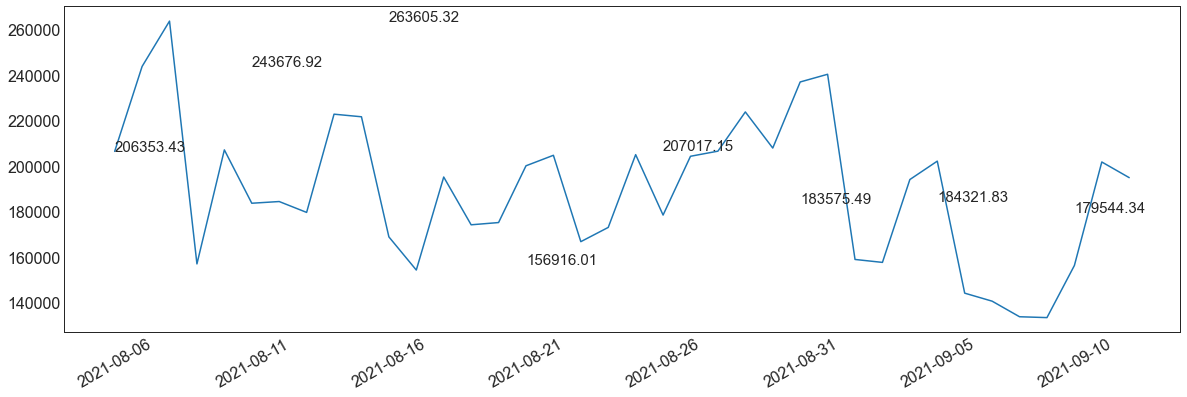

In [114]:
sales_day=df.groupby('drq').sum()['nxsje'].reset_index();
drq=sales_day['drq'].unique();
plt.figure(figsize=(20,6))
plt.plot(sales_day['drq'],sales_day['nxsje']);
t=list([drq[i] for i in range(len(drq)) if i%5==0]);
plt.xticks(t,Rotation=30);
for x,y in zip(t,sales_day['nxsje']):
    plt.text(x,y,'%.2f'%y,fontsize=15)
plt.show(); #show 能隐藏很多细节信息


In [ ]:
### 

### 3、两期销售汇总对比

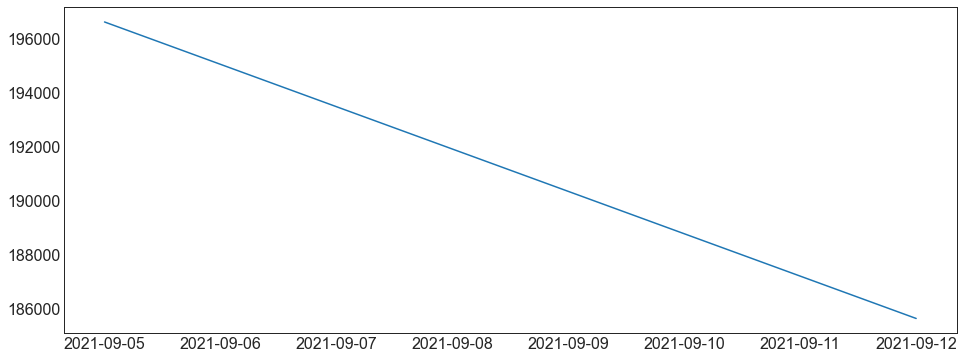

In [254]:
s1=df.groupby('drq').sum()['nxsje'].reset_index()
# s1=sorted(s1)
# s1=s1.sort_values(by='drq').reset_index()
# s1.groupby(pd.Grouper(key='drq',freq='1W')).sum()
s11=s1[s1['drq']<='2021-09-05'];
s21=s1.loc[(s1['drq']>='2021-08-13') & (s1['drq']<='2021-09-12')]
# # 截取时间
# t1=df.loc['2021-08-06':'2021-09-05',:]
# df.set_index('drq').resample('1m').sum()#
# 合并
# s11=pd.pivot_table(s11,values=('drq','nxsje','drq',a))

l1=np.array([[s11['drq'].max()],[s11['drq'].count()],[s11.sum()['nxsje']]])
l2=np.array([[s21['drq'].max()],[s21['drq'].count()],[s21.sum()['nxsje']]])

l1=pd.DataFrame(l1.T,columns=['drq','nts','nzxsje'])
l2=pd.DataFrame(l2.T,columns=['drq','nts','nzxsje'])
# 进行合并
l=pd.concat([l1,l2])
l['nrjxse']=l.apply(lambda x:x['nzxsje']/x['nts'],axis=1)
plt.figure(figsize=(16,6))
plt.plot(l['drq'],l.loc[:,['nrjxse']])


### 4、大类销售汇总
求出大类每日的销售均线，查看是哪些类下降的较快

In [287]:
# 大类每日汇总
# df.head(2)
sales_sdl=df.groupby(['drq','sl']).agg({'nxsje':'sum'}).reset_index()
sales_sdl_1=sales_sdl[sales_sdl['drq']<='2021-09-05'];
sales_sdl_2=sales_sdl.loc[(sales_sdl['drq']>='2021-08-13') & (sales_sdl['drq']<='2021-09-12')]

sales_sdl_1
# 进行合并
l1=sales_sdl_1.groupby('sl').agg(drq=pd.NamedAgg('drq','max'),nts=pd.NamedAgg('drq','count'),
    nxsje=pd.NamedAgg('nxsje','sum')).reset_index()
l2=sales_sdl_2.groupby('sl').agg(drq=pd.NamedAgg('drq','max'),nts=pd.NamedAgg('drq','count'),
    nxsje=pd.NamedAgg('nxsje','sum')).reset_index()
l2
# l2=np.array([[s21['drq'].max()],[s21['drq'].count()],[s21.sum()['nxsje']]])

result1=pd.merge(l2,l1,on='sl',how='left')
result1['nhb']=result1.apply(lambda x : (x['nxsje_x']-x['nxsje_y'])/x['nxsje_y'],axis=1 )
result1['下降金额']=result1.apply(lambda x : (x['nxsje_x']-x['nxsje_y']),axis=1 )
result1.sort_values(by='nhb')
result1.sort_values(by='下降金额')

,sl,drq_x,nts_x,nxsje_x,drq_y,nts_y,nxsje_y,nhb,下降金额
3,04粮油,2021-09-12,31,640184.8930,2021-09-05,31,694368.8632,-0.078033,-54183.9702
13,34散装食品,2021-09-12,31,777501.7464,2021-09-05,31,830251.1076,-0.063534,-52749.3612
17,41散装食杂,2021-09-12,31,332310.4163,2021-09-05,31,375666.6959,-0.115412,-43356.2796
2,03休闲小食,2021-09-12,31,322058.6450,2021-09-05,31,360941.5300,-0.107726,-38882.8850
7,08酒饮料,2021-09-12,31,815300.1916,2021-09-05,31,849027.4804,-0.039725,-33727.2888
4,05厨房调料,2021-09-12,31,345965.1988,2021-09-05,31,375117.9285,-0.077716,-29152.7297
6,07冷冻冷藏,2021-09-12,31,348215.3407,2021-09-05,31,377366.5432,-0.077249,-29151.2025
15,38方便速食,2021-09-12,31,127184.4808,2021-09-05,31,149180.4732,-0.147446,-21995.9924
10,11纸品,2021-09-12,31,222851.6840,2021-09-05,31,237462.4244,-0.061529,-14610.7404
9,10个人护理,2021-09-12,31,551705.2600,2021-09-05,31,559556.8100,-0.014032,-7851.5500


### 中类销售查询
从结果看，0401油、4101散称五谷杂粮、3402散装休闲 下降金额较大

In [277]:
# 中类每日汇总
# df.head(2)
sales_sdl=df.groupby(['drq','sdl']).agg({'nxsje':'sum'}).reset_index()
sales_sdl_1=sales_sdl[sales_sdl['drq']<='2021-09-05'];
sales_sdl_2=sales_sdl.loc[(sales_sdl['drq']>='2021-08-13') & (sales_sdl['drq']<='2021-09-12')]

sales_sdl_1
# 进行合并
l1=sales_sdl_1.groupby('sdl').agg(drq=pd.NamedAgg('drq','max'),nts=pd.NamedAgg('drq','count'),
    nxsje=pd.NamedAgg('nxsje','sum')).reset_index()
l2=sales_sdl_2.groupby('sdl').agg(drq=pd.NamedAgg('drq','max'),nts=pd.NamedAgg('drq','count'),
    nxsje=pd.NamedAgg('nxsje','sum')).reset_index()
l2
# l2=np.array([[s21['drq'].max()],[s21['drq'].count()],[s21.sum()['nxsje']]])

result1=pd.merge(l2,l1,on='sdl',how='left')
result1['nhb']=result1.apply(lambda x : (x['nxsje_x']-x['nxsje_y'])/x['nxsje_y'],axis=1 )
result1['nxsce']=result1.apply(lambda x : (x['nxsje_x']-x['nxsje_y']),axis=1 )
result1.sort_values(by='nxsce').head(20)

,sdl,drq_x,nts_x,nxsje_x,drq_y,nts_y,nxsje_y,nhb,nxsce
70,3402散装休闲,2021-09-12,31,396250.9630,2021-09-05,31,438321.1160,-0.095980,-42070.1530
11,0401油,2021-09-12,31,290148.1000,2021-09-05,31,317884.7000,-0.087254,-27736.6000
75,4101散称五谷杂粮,2021-09-12,31,120047.8495,2021-09-05,31,143111.3585,-0.161158,-23063.5090
9,0304糖果,2021-09-12,31,142840.1450,2021-09-05,31,163274.3300,-0.125152,-20434.1850
14,0406面条和其它,2021-09-12,31,136306.0800,2021-09-05,31,153263.7400,-0.110644,-16957.6600
3,0201膨化,2021-09-12,31,98821.9000,2021-09-05,31,114770.9000,-0.138964,-15949.0000
72,3801速食面,2021-09-12,31,86507.6808,2021-09-05,31,102248.6732,-0.153948,-15740.9924
76,4102散称干货,2021-09-12,31,125227.4378,2021-09-05,31,139879.1826,-0.104746,-14651.7448
8,0302熟食,2021-09-12,31,104268.1000,2021-09-05,31,117623.1000,-0.113541,-13355.0000
16,0502调味汁,2021-09-12,31,145078.7300,2021-09-05,31,156057.2300,-0.070349,-10978.5000


In [ ]:
# 查

In [272]:
df.head(2)

,sXsdh,sFdbh,sSpbh,nXssl,nMl,nXsdj,nxsje,sSpmc,shour,dweek,drq,sFDMC,sflmc,szl,sdl,sl
0,2021080718015301205,012,2501053,0.3182,3.8,19.8,6.3004,散装黎祥陈皮梅软糖,18,31,2021-08-07,跳马店,34020601糖果、奶片,340206糖果、奶片,3402散装休闲,34散装食品
1,2021080718020100101,001,6926896700944,2.0000,1.4,5.0,10.0000,吉香居脆豇豆228g (1*30),18,31,2021-08-07,朱桥店,05040101袋装酱菜,050401袋装酱菜,0504厨房调料—酱菜,05厨房调料


In [3]:
12.9*0.83

10.706999999999999

In [4]:
4/16,2/12

(0.25, 0.16666666666666666)